

# Project: Investigate a Dataset - [No-show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
    - Reading
    - Assessing
    - Cleaning
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
    <li><a href="#Limitations">Limitations</a></li>
    <li><a href="#Conclusion">Conclusion</a></li>
</ul>

<a id='intro'></a>
## Introduction
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
### Dataset Description 

>This dataset includes data like:
  ● 'ScheduledDay' tells us on what day the patient set up their appointment.
  ● 'Neighborhood' indicates the location of the hospital.
  ● 'Scholarship' indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.


### Question(s) for Analysis
- What is the percentage of the patients' no-show to their appointments?
- Which gender misses their appointments more?
- What age usually misses their appointments?
- Is the no-show related to the neighbourhood of the hospital?
- Is having a scholarship related to not showing?
- What is the most popular disease among patients who didn't show up?
- Is having Handcaps has an effect on not showing up?
- Is receiving an SMS related to showing or not?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


In [3]:
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')


In [4]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Data Assessing

In [5]:
df.info()
#no null values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
df.duplicated().sum()
#No duplicated data

0

In [7]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [8]:
df.shape

(110527, 14)

In [10]:
#Fixing incorrect datatypes
for c in df.columns:
    print(c,np.dtype(df[c]))

PatientId float64
AppointmentID int64
Gender object
ScheduledDay object
AppointmentDay object
Age int64
Neighbourhood object
Scholarship int64
Hipertension int64
Diabetes int64
Alcoholism int64
Handcap int64
SMS_received int64
No-show object



### Data Cleaning
- First issue, null values or missing data X
- Second issue, duplicated values X
- Third issue, incorrect datatypes (Exists)

In [11]:
#Split date and time from Scheduled Day
#Correct Datatypes
df['ScheduledDayTime']=pd.to_datetime(df['ScheduledDay']).dt.time
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay']).dt.date
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay']).dt.date

In [12]:
cat_cols=['Gender','Scholarship','Hipertension','Diabetes','Alcoholism','SMS_received','No-show']
for c in cat_cols:
    print(c,df[c].unique())

Gender ['F' 'M']
Scholarship [0 1]
Hipertension [1 0]
Diabetes [0 1]
Alcoholism [0 1]
SMS_received [0 1]
No-show ['No' 'Yes']


In [13]:
df['Handcap'].unique()
df['Handcap']=df['Handcap'].astype('int')

In [14]:
df['PatientId'] = df['PatientId'].astype('O')
df['AppointmentID'] = df['AppointmentID'].astype('O')

In [15]:
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledDayTime
0,29872499824296.0,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,18:38:08
1,558997776694438.0,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,16:08:27
2,4262962299951.0,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,16:19:04
3,867951213174.0,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,17:29:31
4,8841186448183.0,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,16:07:23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2572134369293.0,5651768,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,No,09:15:35
110523,3596266328735.0,5650093,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,No,07:27:33
110524,15576631729893.0,5630692,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,No,16:03:52
110525,92134931435557.0,5630323,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,No,15:09:23


In [17]:

for c in df.columns:
    print(c,np.dtype(df[c]))

PatientId object
AppointmentID object
Gender object
ScheduledDay object
AppointmentDay object
Age int64
Neighbourhood object
Scholarship int64
Hipertension int64
Diabetes int64
Alcoholism int64
Handcap int32
SMS_received int64
No-show object
ScheduledDayTime object


<a id='eda'></a>
## Exploratory Data Analysis

### Question(s) for Analysis
- What is the percentage of the patients' no-show to their appointments?
- Which gender misses their appointments more?
- What age usually misses their appointments?
- Is the no-show related to the neighbourhood of the hospital?
- Is having a scholarship related to not showing?
- What is the most popular disease among patients who didn't show up?
- Is having Handcaps has an effect on not showing up?
- Is receiving an SMS related to showing or not?




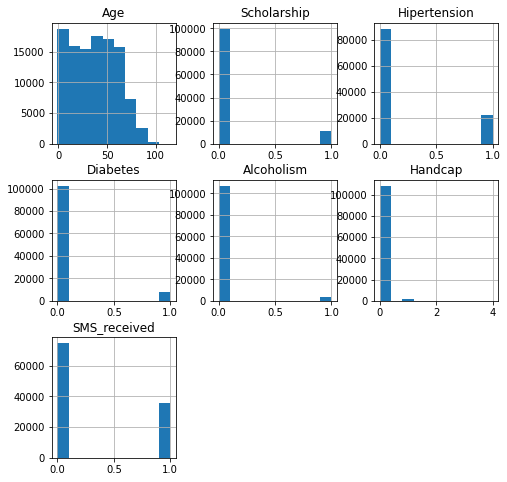

In [18]:
df.hist(figsize=(8,8));

### What is the percentage of the patients who don't show to their appointments?

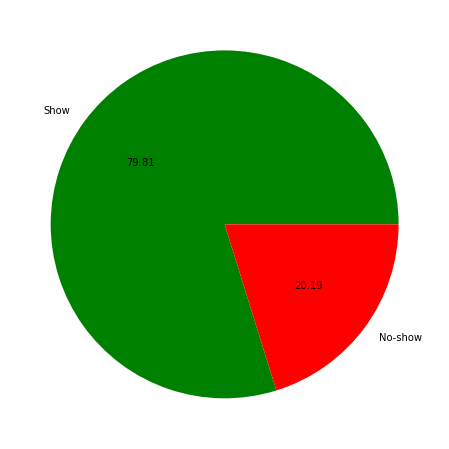

In [19]:

plt.figure(figsize=(8,8))
plt.pie(df['No-show'].value_counts(),colors=['g','r'],labels=['Show','No-show'],autopct='%.2f');


About 20.2% didn't show to their appoinments

###  Which gender misses their appointments more?

<AxesSubplot:>

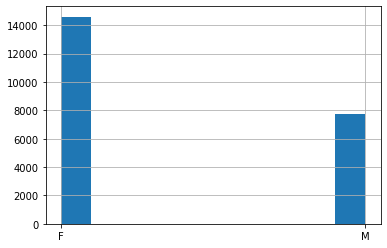

In [20]:
df[df['No-show']=='Yes']['Gender'].hist()

Females don't show to their appointments more than males

###  What age usually misses their appointments?

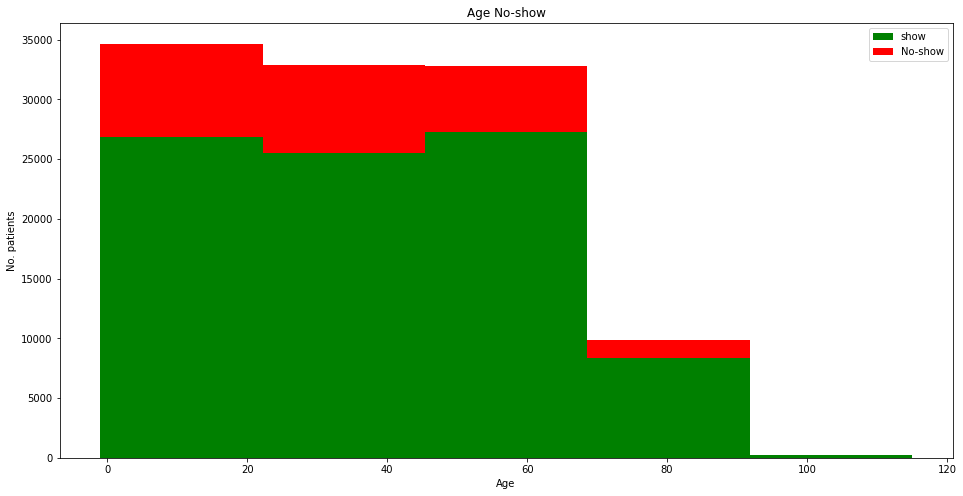

In [22]:
fig = plt.figure(figsize=(16,8))
plt.hist([df[df['No-show']=='No']['Age'],df[df['No-show']=='Yes']['Age']], stacked=True, color=['g','r'], label=['show','No-show'],bins=5)
plt.xlabel('Age')
plt.ylabel('No. patients')
plt.title('Age No-show')
plt.legend()
plt.show();

The biggest range of ages who didn't show in their appointments is between (0:45)

###  Is the no-show related to the neighbourhood of the hospital?

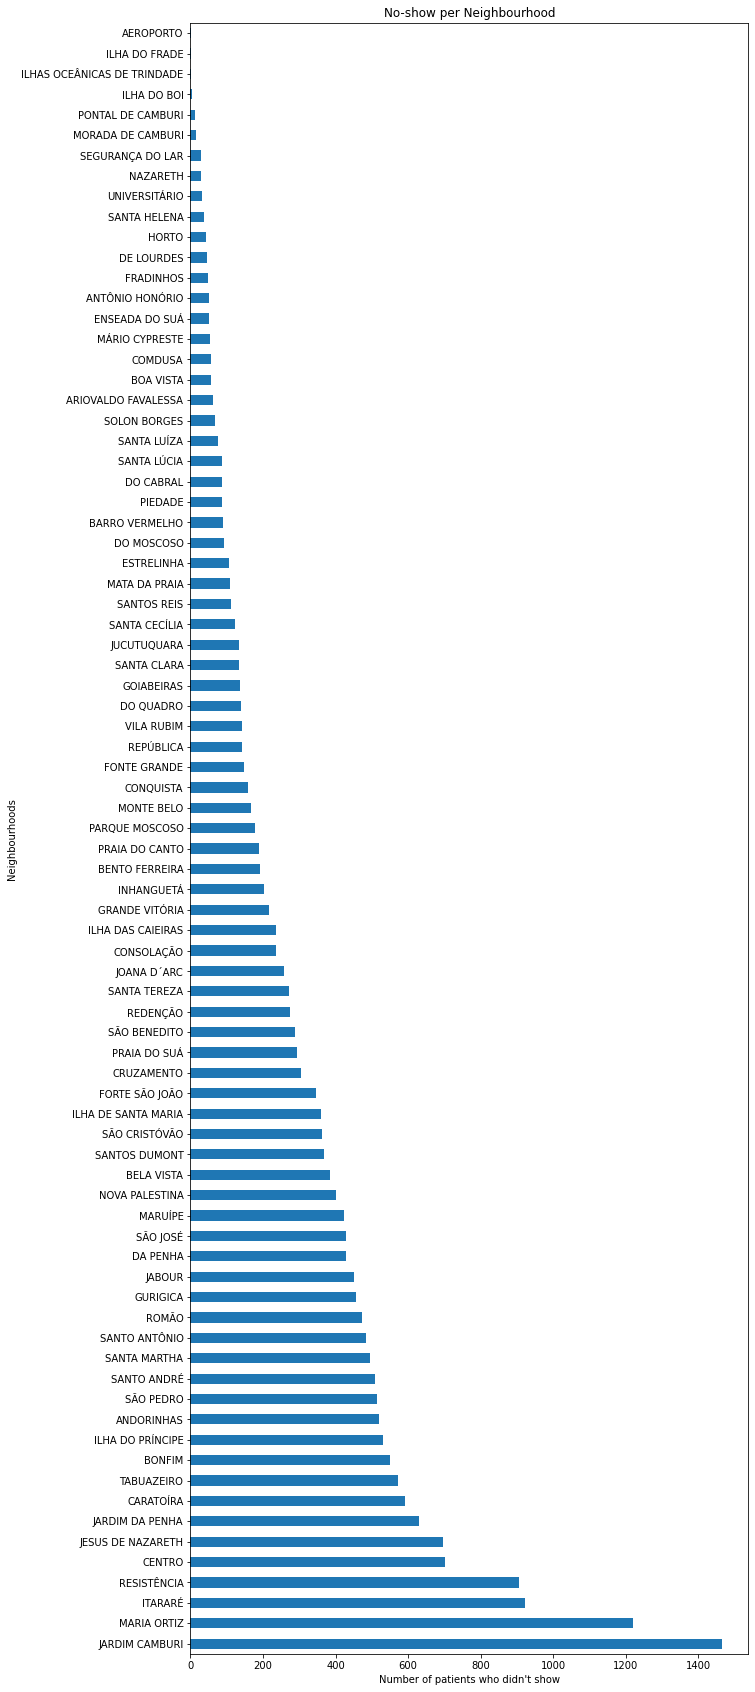

In [23]:
df[df['No-show']=='Yes']['Neighbourhood'].value_counts().plot(kind ='barh',figsize=(10,30));
#df['Neighbourhood'].value_counts().plot(kind ='barh',figsize=(15,20));
plt.xlabel("Number of patients who didn't show")
plt.ylabel('Neighbourhoods')
plt.title('No-show per Neighbourhood');

Looks likeJardim Camburi has the most number of no-shows

### Is having a scholarship related to not showing?

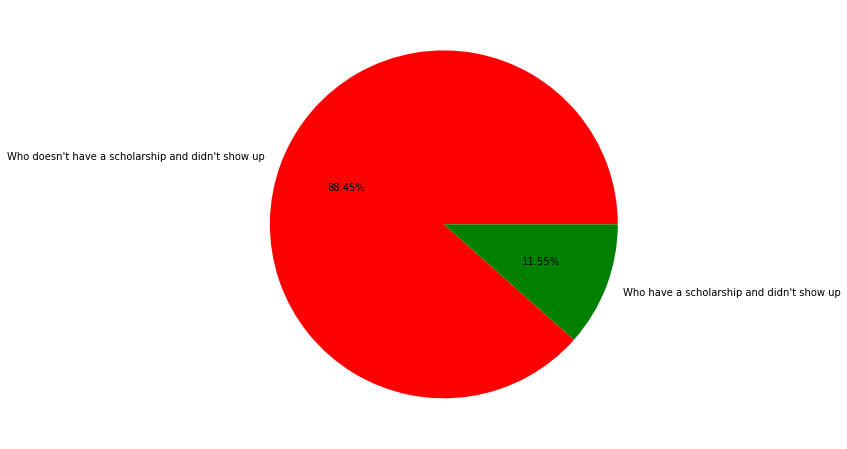

In [24]:
plt.figure(figsize=(8,8))
groups=df.groupby('No-show')['Scholarship'].value_counts()
x= groups['Yes'][0]
y= groups['Yes'][1]
plt.pie([groups['Yes'][0],y],autopct='%.2f%%',colors=['r','g'],labels=['Who doesn\'t have a scholarship and didn\'t show up','Who have a scholarship and didn\'t show up'])

plt.show()

Only about 11.5% of the people who didn't show up had a scholarship

### What is the most popular disease among patients who didn't show up?

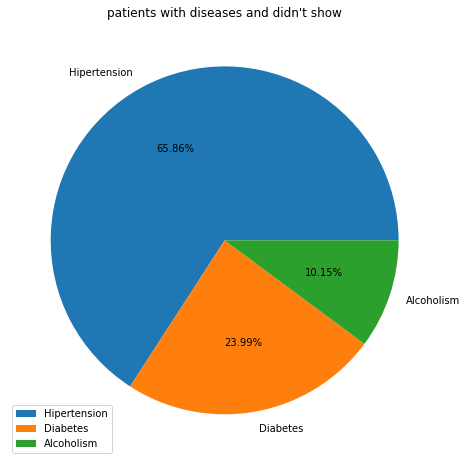

In [26]:
plt.figure(figsize=(8,8))
diseases=['Hipertension','Diabetes','Alcoholism']
v=[]
for d in diseases:
    n=df.groupby(d)['No-show'].count()
    v.append(n[1])
s=sum(v)
plt.pie(v,labels=diseases,autopct='%.2f%%')
plt.legend(loc='best')
plt.title('patients with diseases and didn\'t show')
plt.show();

People with Hipertension are most likely not to show up

### Is having Handcaps has an effect on not showing up?

In [28]:
df['Handcap'].unique()

array([0, 1, 2, 3, 4])

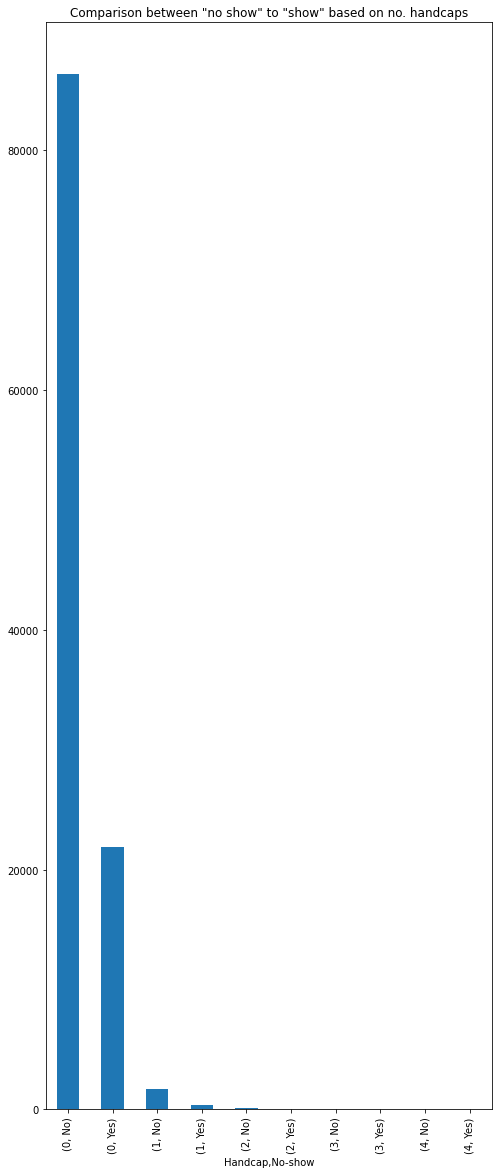

In [29]:
plt.figure(figsize=(8,20))
#plt.bar(df['Handcap'].unique(),df[df['No-show']=='Yes'].count())
h=df.groupby(['Handcap','No-show'])['No-show'].count()
h.plot(kind='bar',title='Comparison between "no show" to "show" based on no. handcaps')
plt.show()

Handcaps don't prevent people from showing up to their appointments

### Is receiving an SMS related to showing or not?

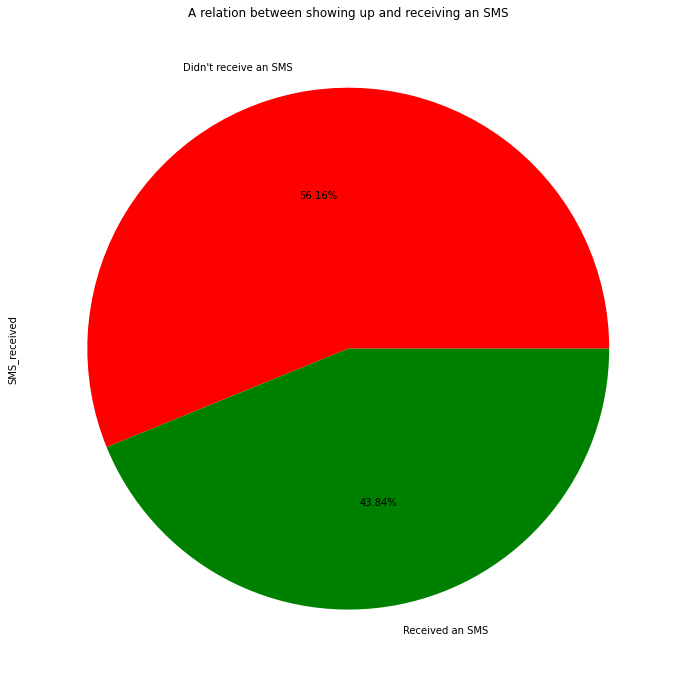

In [31]:
plt.figure(figsize=(12,12))
df[df['No-show']=='Yes']['SMS_received'].value_counts().plot(kind='pie',labels=["Didn't receive an SMS","Received an SMS"],title='A relation between showing up and receiving an SMS',colors=['r','g'],autopct='%.2f%%');

People who didn't receive a message showed up less.

<a id='conclusions'></a>
## Conclusions

- About 20.2% didn't show to their appoinments
- Females don't show to their appointments more than males
- The biggest range of ages who didn't show in their appointments is between (0:45)
- Looks likeJardim Camburi has the most number of no-shows
- Only about 11.5% of the people who didn't show up had a scholarship
- People with Hipertension are most likely not to show up
- Handcaps don't prevent people from showing up to their appointments
- People who didn't receive an SMS showed up less.
